In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split


#import the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre-processing
from sklearn import preprocessing

In [12]:
#import the datasets

df = pd.read_csv("/content/Obesity Classification.csv")

In [13]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [14]:
df['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [15]:
df.describe()


,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [17]:
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [18]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,NaN,175,80,25.3,Normal Weight
1,2,30,NaN,160,60,22.5,Normal Weight
2,3,35,NaN,180,90,27.3,Overweight
3,4,40,NaN,150,50,20.0,Underweight
4,5,45,NaN,190,100,31.2,Obese


In [19]:
df.isnull().sum()

ID          0
Age         0
Gender    108
Height      0
Weight      0
BMI         0
Label       0
dtype: int64

In [24]:
df['Gender'].fillna(0, inplace=True)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,0.0,175,80,25.3,0
1,2,30,0.0,160,60,22.5,0
2,3,35,0.0,180,90,27.3,2
3,4,40,0.0,150,50,20.0,3
4,5,45,0.0,190,100,31.2,1


In [25]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [20]:
# use label encoder to convert Label into numbers

label_encoder = preprocessing.LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [26]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,0.0,175,80,25.3,0
1,2,30,0.0,160,60,22.5,0
2,3,35,0.0,180,90,27.3,2
3,4,40,0.0,150,50,20.0,3
4,5,45,0.0,190,100,31.2,1


In [22]:
df['Label'].value_counts()

3    47
0    29
2    20
1    12
Name: Label, dtype: int64

In [27]:
df.drop(labels='ID',axis=1,inplace=True)
df

,Age,Gender,Height,Weight,BMI,Label
0,25,0.0,175,80,25.3,0
1,30,0.0,160,60,22.5,0
2,35,0.0,180,90,27.3,2
3,40,0.0,150,50,20.0,3
4,45,0.0,190,100,31.2,1
...,...,...,...,...,...,...
103,11,0.0,175,10,3.9,3
104,16,0.0,160,10,3.9,3
105,21,0.0,180,15,5.6,3
106,26,0.0,150,15,5.6,3


In [44]:
# Separate the features (x) and the target variable (y).
# x, y are variable names used mostly for fetaure and target variables
x = df.drop('Label', axis=1)
y = df['Label']

# Split the dataset into training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [45]:
x_test

,Age,Gender,Height,Weight,BMI
93,12,0.0,175,15,5.6
39,22,0.0,160,45,18.7
70,25,0.0,180,55,21.2
7,60,0.0,130,30,13.3
100,47,0.0,130,30,13.3
19,63,0.0,120,30,13.3
94,17,0.0,160,15,5.6
73,40,0.0,140,50,20.0
27,103,0.0,130,30,13.3
101,52,0.0,210,35,16.7


In [46]:
y_test

93     3
39     3
70     0
7      3
100    3
19     3
94     3
73     3
27     3
101    3
9      3
77     0
46     1
47     2
26     1
107    3
62     0
24     1
81     3
11     3
30     0
42     2
Name: Label, dtype: int64

In [47]:
#### Building Decision Tree Classifier using Entropy as a Criterion

model =  DecisionTreeClassifier(criterion='entropy',max_depth = 4)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.3333333333333333, 0.9, 'x[4] <= 20.6\nentropy = 1.86\nsamples = 86\nvalue = [25, 9, 18, 34]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 0, 34]'),
 Text(0.5, 0.7, 'x[4] <= 24.6\nentropy = 1.476\nsamples = 52\nvalue = [25, 9, 18, 0]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 97.5\nentropy = 1.295\nsamples = 30\nvalue = [3, 9, 18, 0]'),
 Text(0.5, 0.3, 'x[0] <= 28.5\nentropy = 0.592\nsamples = 21\nvalue = [3, 0, 18, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.297\nsamples = 19\nvalue = [1, 0, 18, 0]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]')]

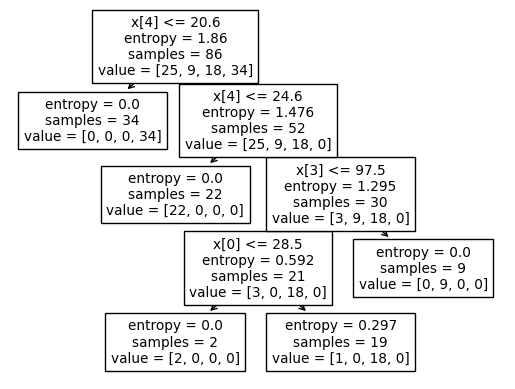

In [48]:
## PLot the decsion Tree
tree.plot_tree(model)

[Text(0.3333333333333333, 0.9, 'BMI <= 20.6\nentropy = 1.86\nsamples = 86\nvalue = [25, 9, 18, 34]\nclass = Obese'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 0, 34]\nclass = Obese'),
 Text(0.5, 0.7, 'BMI <= 24.6\nentropy = 1.476\nsamples = 52\nvalue = [25, 9, 18, 0]\nclass = Underweight'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0]\nclass = Underweight'),
 Text(0.6666666666666666, 0.5, 'Weight <= 97.5\nentropy = 1.295\nsamples = 30\nvalue = [3, 9, 18, 0]\nclass = Overweight'),
 Text(0.5, 0.3, 'Age <= 28.5\nentropy = 0.592\nsamples = 21\nvalue = [3, 0, 18, 0]\nclass = Overweight'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]\nclass = Underweight'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.297\nsamples = 19\nvalue = [1, 0, 18, 0]\nclass = Overweight'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0]\nclass = Normal Weight')]

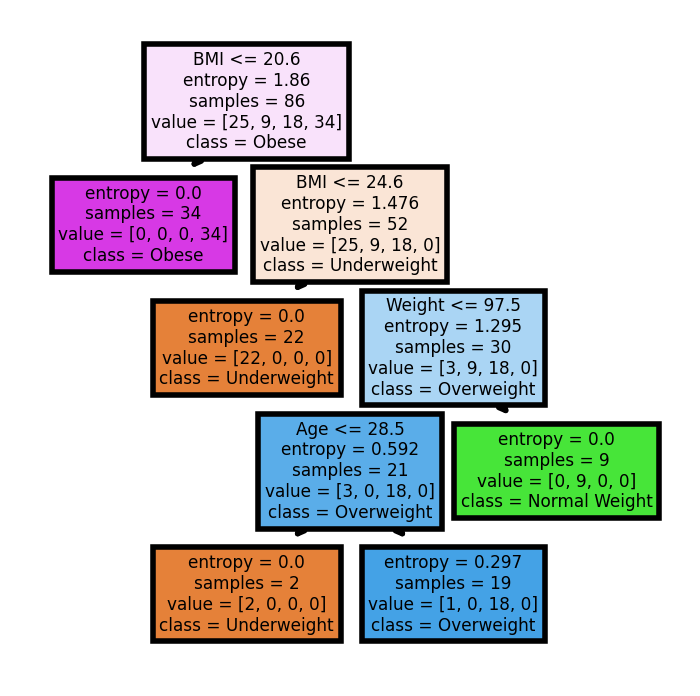

In [49]:
fn = ['Age','Gender','Height','Weight','BMI']
cn = ['Underweight','Normal Weight','Overweight','Obese']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

In [50]:
####Prediction on the Test data
preds = model.predict(x_test)

In [51]:
pd.Series(preds).value_counts()

3    13
0     4
1     3
2     2
dtype: int64

In [52]:
preds

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1, 3, 3, 0, 2])

In [53]:
y_test

93     3
39     3
70     0
7      3
100    3
19     3
94     3
73     3
27     3
101    3
9      3
77     0
46     1
47     2
26     1
107    3
62     0
24     1
81     3
11     3
30     0
42     2
Name: Label, dtype: int64

In [54]:
#### Crosstab : Way to understand the two way table between predicted vs actual
pd.crosstab(y_test,preds)

col_0,0,1,2,3
Label,,,,
0,4,0,0,0
1,0,3,0,0
2,0,0,2,0
3,0,0,0,13


In [55]:
### Accuracy of the above model
np.mean(preds==y_test)

1.0